In [1]:
### Taken from sklearn-example

### Generate some curcular data 

Using sklearn api of **make_circles**

In [2]:
import numpy as np
from sklearn.datasets import make_circles

#Generate Data
np.random.seed(144)
X, y = make_circles(n_samples=200, factor=.3, noise=.05)

Let us plot above generate data by mapping and colouring points distinctively, **0's as red dots** and **1's as blue dots/circles**

Text(0,0.5,'$x_2$')

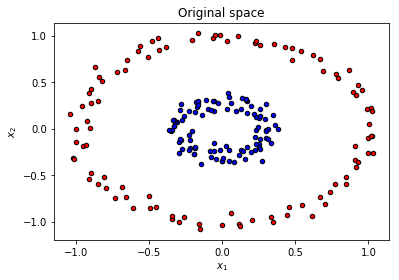

In [3]:
import matplotlib.pyplot as plt
%matplotlib inline

plt.title("Original space")
reds  = (y == 0)
blues = (y == 1)

plt.scatter(X[reds, 0], X[reds, 1], c="red", s=20, edgecolor='k')
plt.scatter(X[blues, 0], X[blues, 1], c="blue",s=20, edgecolor='k')
plt.xlabel("$x_1$")
plt.ylabel("$x_2$")

In [4]:
from sklearn.decomposition import KernelPCA

#Use Gaussian/Radial Basis Function(rpf) kernel
kpca = KernelPCA(kernel="rbf", fit_inverse_transform=True, gamma=10)
X_kpca = kpca.fit_transform(X)
X_back = kpca.inverse_transform(X_kpca)


#-------------------------------------------------------

from sklearn.decomposition import PCA
#We also do Ordinary PCA - for comparison
pca = PCA()
X_pca = pca.fit_transform(X)

In [5]:
#X[0:5, :]
#y[0:5]

In [6]:
X1, X2 = np.meshgrid(np.linspace(-1.5, 1.5, 50), np.linspace(-1.5, 1.5, 50))
X_grid = np.array([np.ravel(X1), np.ravel(X2)]).T

# projection on the first principal component (in the phi(x) space)
Z_grid = kpca.transform(X_grid)[:, 0].reshape(X1.shape)

In [7]:
#kpca.transform(X_grid).shape
#Z_grid.shape

Text(0,0.5,'2nd component')

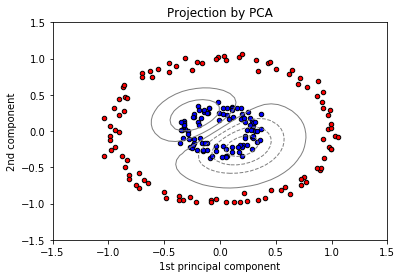

In [8]:
import matplotlib.pyplot as plt
%matplotlib inline

#Which Contours? We do not need it
plt.contour(X1, X2, Z_grid, colors='grey', linewidths=1, origin='lower')

plt.scatter(X_pca[reds, 0], X_pca[reds, 1], c="red", s=20, edgecolor='k')
plt.scatter(X_pca[blues, 0], X_pca[blues, 1], c="blue", s=20, edgecolor='k')
plt.title("Projection by PCA")
plt.xlabel("1st principal component")
plt.ylabel("2nd component")

### Projections by ordrinasy PCA 

data has already got two components, we do not expect much change doing ordinary PCA in terms of linear  separability or change of shape

Text(0,0.5,'2nd component')

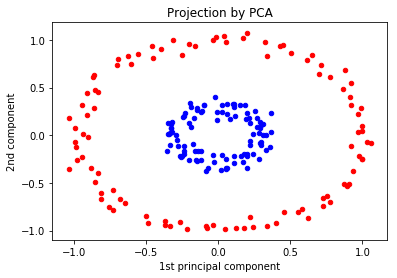

In [9]:
import matplotlib.pyplot as plt
%matplotlib inline

plt.scatter(X_pca[reds, 0],   X_pca[reds, 1], c="red",  s=20)
plt.scatter(X_pca[blues, 0], X_pca[blues, 1], c="blue", s=20)
plt.title("Projection by PCA")
plt.xlabel("1st principal component")
plt.ylabel("2nd component")

Text(0,0.5,'2nd component')

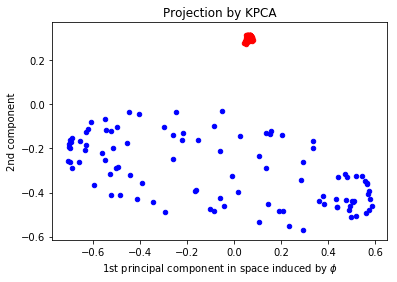

In [10]:
import matplotlib.pyplot as plt
%matplotlib inline

#plt.subplot(2, 2, 3, aspect='equal')
plt.scatter(X_kpca[reds, 0],  X_kpca[reds, 1],  c="red",  s=20)
plt.scatter(X_kpca[blues, 0], X_kpca[blues, 1], c="blue", s=20)
plt.title("Projection by KPCA")
plt.xlabel("1st principal component in space induced by $\phi$")
plt.ylabel("2nd component")

Text(0,0.5,'$x_2$')

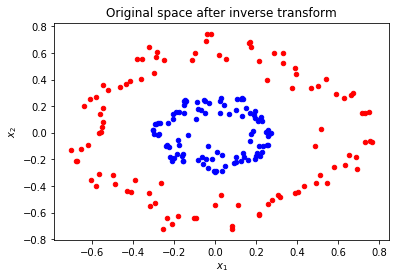

In [11]:
import matplotlib.pyplot as plt
%matplotlib inline

#plt.subplot(2, 2, 4, aspect='equal')
plt.scatter(X_back[reds, 0], X_back[reds, 1], c="red", s=20 )
plt.scatter(X_back[blues, 0], X_back[blues, 1], c="blue", s=20)
plt.title("Original space after inverse transform")
plt.xlabel("$x_1$")
plt.ylabel("$x_2$")